<a href="https://colab.research.google.com/github/helookscool/DEEP_Learning_Machine_129/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EB%B3%B8_%ED%9D%90%EB%A6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

※ 책 [파이썬 딥러닝 텐서플로] 목차를 기본으로 한 써머리.

# 01. 딥러닝 준비

# 1-1 주요용어

## 1-1-1 하이퍼 파라미터(hyper-parameter) 

하이퍼파라미터(hyper-parameter)는 딥러닝뿐만 아니라 머신러닝 모델을 훈련할때 사용자가 직접 설정해주는 설정값을 뜻한다. 모델이 훈련하면서 가중치(weight)와 편향 (bias)은 자동 업데이트되고 조정되며 알아서 변하는 값들이지만 그 외에 학습 속도나 반복 훈련 횟수 등 사용자가 직접 설정해야 하는 값들이 매우 많다.

사용자가 별도로 설정해주지 않으면 기본값이 지정되어 있어서 자동으로 적용된다.

하이퍼파라미터의 값을 조절하는 행위를 하이퍼파라미터 튜닝 (tunin)이라고도 한다.
(하이퍼파라미터 튜닝은 딥러닝 프로텍트 초기단계보다는 가장 마지막 단계에 진행하는것을 추천)

## 1-2-2 과소적합 vs 과대적합

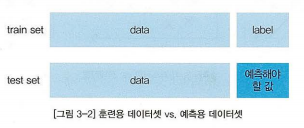

## 1-1-3 에포크(epoch)
딥러닝 모델이 반복 훈련을 할때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프(loop)를 1 epoch라고 함.
* epoch역시 중요한 하이퍼파라미터이다. 사전에 설정한 최대 epoch까지 반복합습이 끝나더라도 모델이 과소적합되었다고 판단된다면 epoch를 늘려서 다시 학습할 필요가 있다. 이와 반대라면 epoch를 줄여서 최적구간에서 학습을 조기에 종료하는 것이 과대적합을 방지하고 시간을 절약할 수 있다. 

## 1-1-4 손실함수(Loss function)
‘예측 값과 정답 값의 차이 또는 오차', 오차는 딥러닝 모델의 출력값과 실제값의 차이를 말한다. 

딥러닝 모델에 적용하는 손실함수는 사용자가 정의해야한다. 분류나 뢰귀모델에 따라 손실함수를 다르게 적용하는 것이 일반적이다. 

지도학습의 분류문제는 이진 분류(binary classification)와 다중 분류 
(multi-class classifìcation)로 구분할 수 있다.

이진분류문제를 해결하기 위해서는 'binary_crossentropy' 손실함수를 사용하며, 출력층의 활성화함수(activation function)가 'sigmoid'인 경우를 말한다. 

다중분류문제에는 'categorical_crossentropy'손실함수를 사용하며, 다중분류의 대상이 되는 클래스가 원핫 벡터(one-hot vector)인 경우 사용한다. 

정답 클래스가 원핫 인코딩이 아닌 레이블 값(eg)0,1,2,3, ...)으로 표현되어 서로 다른 숫자로 구분되어 있으면 'sparse_categorical_crossentropy'손실함수를 사용한다.

그리고 다중분류문제에서는 출력층의 활성화 함수로 'softmax'를 사용한다. 

한편 회귀모델의 경우 손실함수는 평균제곱오차(Mean Squared Error), 평균절대값오차 (Mean Absolute Error), 후버(Huber) 등이 사용된다.

텐서플로는 사전 정의된 손실함수를 함수형(Functional API)과 클래스형(Subclassing)으로 제공하고 있으며, 일반적으로 많이 사용하는 손실함수 목록은 다음과 같다. 

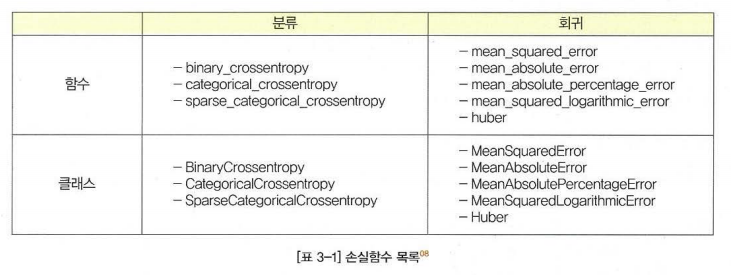

다음 예제와 같이, 클래스 및 함수 형태로 정의되어있는 손실함수를 지정하여 사용한다. 

In [1]:
import tensorflow as tf

#클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function tensorflow.python.keras.losses.binary_crossentropy>

## 1-1-5 경사하강법(gradient descent)
경사하강법은 딥러닝 모델을 훈련할 때, 모델 내부의 가중치(Weight)에 대한 미분값을 구하고 목적함수 값이 낮아지는 방향으로 차감하면서 결국 최소함수 값을 갖도록 하는 방법이다.  

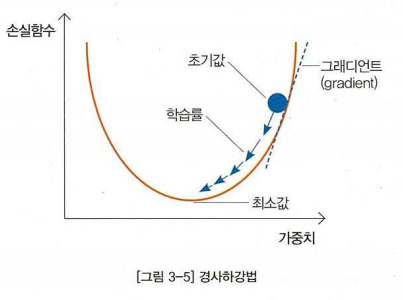

경사하강법은 현재 공개된 다양한 옵치마이져(최적화함수)의 근간이 되는 알고리즘이다.  --> 수식 설명은 책 위주로. 

#1-2 딥러닝 프로세스

딥러닝 모델구축 및 훈련을 위해서는 다음과 같은 프로세스를 따른다. 

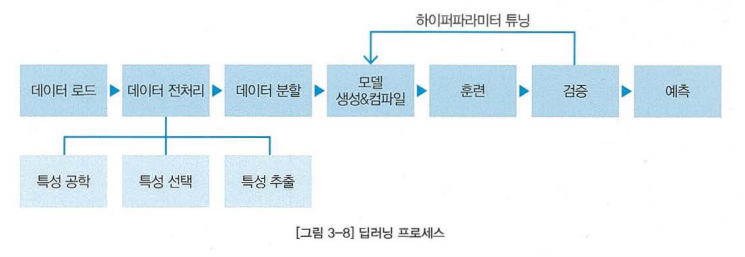

데이터 전처리, 모델의 생성, 컴파일, 훈련은 모델의 훈련을위한 필수 프로세스로 누락되는 단계는 없다. 예측은 예측용 데이터셋을 입력하여 모델 예측값을 얻는 과정이다. 검증은 모델의 성능을 평가하는 단계를 말한다.

# 1-2-1 데이터 전처리
pass

#1-2-2 모델 생성
모델을 생성하는 방법은 크게 세가지.
- 순차적인 구조의 모델은 Sequential API로 구현

- 다중 입력 및 다중 출력을 가지고 복잡한 구조를 갖는 모델은 Functional API 혹은 Model Subclassing방법으로 구현한다.

#1-2-3 모델 컴파일

딥러닝 모델의 구조를 정의하고 생성한 뒤에는 , 생성된 모델 훈련에 사용할 손실함수(Loss), 옵티마이져(Optimizer), 평가지표(Metrics) 등을 정의한다. 모델 인스턴스에 compile()메소드를 적용하고, 앞에서 열거한 여러가지 속성값을 설정한다. 이과정을 컴파일 단계라고 한다. 

#1-2-4 모델 훈련
fit()함수에 모델 훈련에 핑요한 정보를 매개변수(또는 파라미터)로 전달한다, 훈련 데이터셋, 검증 데이터셋 ,epoch, 배치(batch)크기 및 콜백(callback) 함수들을 지정한다. 

#1-2-5 모델검증
모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산한다. 

#1-2-6 모델예측

응 예측. 



# 02. 단순 신경망 훈련

# 2-1 선형회귀
응. 책봐

# 2-2 뉴런

